[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gsg213/Computer_Vision_DL/blob/master/CNN/LeNet5.ipynb)

# LeNet5
Building and training LeNet5 with Tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as lk
import tensorflow.keras.models as mk

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
#download mnist dataset
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print('Training images: %s, Labels size: %s' %(x_train.shape, y_train.shape))
print('Test images: {0}, Labels size: {1}'.format(x_test.shape, y_test.shape))

Training images: (60000, 28, 28), Labels size: (60000,)
Test images: (10000, 28, 28), Labels size: (10000,)


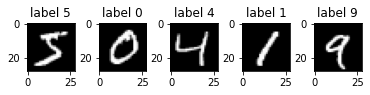

In [ ]:
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(x_train[i],cmap='gray')
  plt.gca().set_title('label '+str(y_train[i]))

plt.subplots_adjust(hspace=0.0, wspace = 0.5)
plt.show()

In [ ]:
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))
print('Training images: %s, Labels size: %s' %(x_train.shape, y_train.shape))
print('Test images: {0}, Labels size: {1}'.format(x_test.shape, y_test.shape))

Training images: (60000, 28, 28, 1), Labels size: (60000,)
Test images: (10000, 28, 28, 1), Labels size: (10000,)


In [ ]:
#normalize, normally better results use mean and 
#(x-x.mean)/x.std()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train , x_test = ((x_train-x_train.min())/(x_train.max()-x_train.min())),((x_test-x_test.min())/(x_test.max()-x_test.min()))


In [ ]:
x_valid, x_train = x_train[:10000], x_train[10000:]
y_valid, y_train = y_train[:10000], y_train[10000:] 

In [ ]:
tf.keras.backend.clear_session

<function tensorflow.python.keras.backend.clear_session>

In [ ]:
#layers LeNet5

inputs  = lk.Input(shape=(28,28,1))

#padding 'same' allows to maintain same image input size
conv1 = lk.Conv2D(6,(5,5),padding='same',activation='relu')(inputs)

pool1 =  lk.MaxPool2D((2,2),(2,2))(conv1)

#padding valid = not padding
conv2 = lk.Conv2D(16,(5,5),padding='valid', activation='relu')(pool1)

pool2 =  lk.MaxPool2D((2,2),(2,2))(conv2)

flat = lk.Flatten()(pool2)

fc1 = lk.Dense(120,activation='relu')(flat)

fc2 = lk.Dense(84,activation='relu')(fc1)

outputs = lk.Dense(10,activation='softmax')(fc2)

#model
model = mk.Model(inputs,outputs)
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               4812

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, epochs=8, batch_size = 128,verbose = 1,validation_data=(x_valid, y_valid))

Epoch 1/8
391/391 [==============================] - 2s 4ms/step - loss: 0.7429 - accuracy: 0.7813 - val_loss: 0.1380 - val_accuracy: 0.9601
Epoch 2/8
391/391 [==============================] - 1s 4ms/step - loss: 0.1023 - accuracy: 0.9679 - val_loss: 0.0844 - val_accuracy: 0.9750
Epoch 3/8
391/391 [==============================] - 1s 4ms/step - loss: 0.0689 - accuracy: 0.9786 - val_loss: 0.0599 - val_accuracy: 0.9825
Epoch 4/8
391/391 [==============================] - 1s 4ms/step - loss: 0.0526 - accuracy: 0.9834 - val_loss: 0.0793 - val_accuracy: 0.9765
Epoch 5/8
391/391 [==============================] - 1s 4ms/step - loss: 0.0414 - accuracy: 0.9871 - val_loss: 0.0463 - val_accuracy: 0.9876
Epoch 6/8
391/391 [==============================] - 1s 4ms/step - loss: 0.0328 - accuracy: 0.9894 - val_loss: 0.0467 - val_accuracy: 0.9864
Epoch 7/8
391/391 [==============================] - 1s 4ms/step - loss: 0.0281 - accuracy: 0.9911 - val_loss: 0.0522 - val_accuracy: 0.9863
Epoch 8/8
391

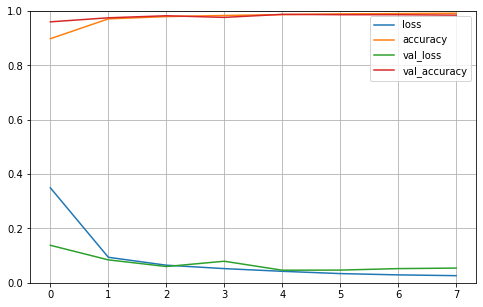

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
pd.DataFrame(history.history).plot(figsize=(8,5)) 
plt.grid(True) 
plt.gca().set_ylim(0,1) 
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0410 - accuracy: 0.9861


[0.04102136194705963, 0.9861000180244446]